<a href="https://colab.research.google.com/github/johnnyagaka/Data-Science-Projects/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone Project
##Smart Predictive Analysis in clinical trial Research: The case of Covid-19

By John Morisi Okero Nyagaka

[
MIT Licence](https://opensource.org/licenses/MIT)

#Introduction

Data used for the project is from kaggle
There are two datasets used which can be accessed via this [Patient Pre-condition-Dataset](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset) and [Covid-19 Clinical Trials](https://www.kaggle.com/parulpandey/covid19-clinical-trials-dataset)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Setting up to download covid-19 patient precondition dataset

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"johnnyagaka","key":"e41b87e09743965c851f96c504fc5589"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json! 

chmod: cannot access '/root/.kaggle/kaggle.json!': No such file or directory


In [ ]:
! kaggle datasets download -d tanmoyx/covid19-patient-precondition-dataset

 66% 5.00M/7.56M [00:00<00:00, 37.4MB/s]
100% 7.56M/7.56M [00:00<00:00, 48.1MB/s]


In [ ]:
!ls

covid19-patient-precondition-dataset.zip  kaggle.json  sample_data


##Loading the data: Covid-19 Clinical Trials Dataset

This dataset was obtained from [Clinical Trials Transformation Initiative(CTTI)](https://www.ctti-clinicaltrials.org/) and can be accessed [here](https:https://aact.ctti-clinicaltrials.org/covid_19//)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trial_data = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/covid-19 trials.tsv", sep = '\t')

In [ ]:
trial_data.shape

(5059, 68)

In [ ]:
trial_data.head()

,nct_id,title,acronym,other_ids,url,status,why_stopped,hcq,has_dmc,funded_bys,sponsor_collaborators,lead_sponsor,collaborators,study_type,phases,enrollment,brief_summary,detailed_description,conditions,keywords,interventions,intervention_details,arm_details,arm_intervention_details,outcome_measures,start_date,primary_completion_date,completion_date,first_posted,results_first_posted,last_update_posted,nlm_download_date,study_first_submitted_date,has_expanded_access,is_fda_regulated_drug,is_fda_regulated_device,is_unapproved_device,locations,number_of_facilities,has_us_facility,has_single_facility,study_design,number_of_arms,number_of_groups,primary_purpose,intervention_model,observational_model,allocation,masking,subject_masked,caregiver_masked,investigator_masked,outcomes_assessor_masked,adaptive_protocol,master_protocol,platform_protocol,umbrella_protocol,basket_protocol,minimum_agey,maximum_agey,gender,gender_based,gender_description,healthy_volunteers,population,criteria,study_results,study_documents
0,NCT00571389,Isolation and Culture of Immune Cells and Circ...,NaN,BioCytics 0001|WIRB Protocol # 20070969,https://ClinicalTrials.gov/show/NCT00571389,Recruiting,NaN,No,Yes,Industry,"BioCytics, Inc.","BioCytics, Inc.[Industry]",NaN,Observational,NaN,1000.0,Primary Objective: This is a study to investig...,NaN,"Solid Tumor, Adult|Healthy Donors|COVID-19 Donors",All Stages of cancer|All stages of solid tumor...,NaN,NaN,NaN,NaN,NaN,2007-11-30,2025-02-28,2025-02-28,2007-12-12,NaN,2020-09-10,ClinicalTrials.gov processed this data on Janu...,2007-12-10,No,No,No,No,"Carolina BioOncology Institute, Huntersville, ...",1,Yes,Yes,Observational Model: Case-Only|Time Perspectiv...,NaN,NaN,NaN,NaN,Case-Only,NaN,NaN,No,No,No,No,No,No,Yes,No,No,18 Years,NaN,All,NaN,NaN,Accepts Healthy Volunteers,The population of patients to be enrolled for ...,Inclusion Criteria for Biospecimen(s) collecti...,No,NaN
1,NCT01306084,Viral Infections in Healthy and Immunocompromi...,NaN,110109|11-I-0109,https://ClinicalTrials.gov/show/NCT01306084,Recruiting,NaN,No,No,NIH,National Institute of Allergy and Infectious D...,National Institute of Allergy and Infectious D...,NaN,Observational,NaN,1000.0,Background: - Viral infections are an importan...,Viral infections are an important cause of mor...,Anogenital Herpes|Herpes Labialis|COVID-19,SARS-CoV-2|Adenovirus|Viral Infection|Respirat...,NaN,NaN,N/A:1:NIH campus workers who have recently rec...,NaN,"Sample collection, analysis of immune function...",2011-03-15,NaN,NaN,2011-03-01,NaN,2021-02-10,ClinicalTrials.gov processed this data on Febr...,2011-02-26,No,No,No,No,"National Institutes of Health Clinical Center,...",1,Yes,Yes,Observational Model: Other|Time Perspective: P...,NaN,4.0,NaN,NaN,Other,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,NaN,All,NaN,NaN,No,Healthy or immunocompromised subjects with vir...,- INCLUSION CRITERIA: 1. The protocol is open ...,No,NaN
2,NCT02735707,"Randomized, Embedded, Multifactorial Adaptive ...",REMAP-CAP,U1111-1189-1653|2015-002340-14|602525|16/631|A...,https://ClinicalTrials.gov/show/NCT02735707,Recruiting,NaN,Yes,Yes,Other,MJM Bonten|Australian and New Zealand Intensiv...,MJM Bonten[Other],Australian and New Zealand Intensive Care Rese...,Interventional,Phase 4,7100.0,"REMAP-CAP is a randomised, embedded, multifact...",Community-acquired pneumonia (CAP) that is of ...,"Community-acquired Pneumonia, Influenza, COVID-19",Respiratory Tract Infections|Therapeutic Antic...,Drug: Fixed-duration Hydrocortisone|Drug: Shoc...,Drug:Fixed-duration Hydrocortisone:50mg of int...,Active Comparator:Eritoran:Patients will recei...,Active Comparator[Eritoran]:Drug[Eritoran]|Act...,Proportion of intubated patients who receive a...,2016-04-11,2021-12-31,2023-12-31,2016-04-13,NaN,2020-10-12,ClinicalTrials.gov processed this data on Janu...,2015-12-11,No,Yes,No,No,"University of Pittsburgh Medical Centre, Pitts...",90,Yes,No,Allocation: Randomized|Intervention Model: Fac...,38.0,NaN,Treatment,Factorial 

In [ ]:
trial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nct_id                      5059 non-null   object 
 1   title                       5059 non-null   object 
 2   acronym                     2191 non-null   object 
 3   other_ids                   5058 non-null   object 
 4   url                         5059 non-null   object 
 5   status                      5059 non-null   object 
 6   why_stopped                 185 non-null    object 
 7   hcq                         5059 non-null   object 
 8   has_dmc                     5059 non-null   object 
 9   funded_bys                  5059 non-null   object 
 10  sponsor_collaborators       5059 non-null   object 
 11  lead_sponsor                5059 non-null   object 
 12  collaborators               1754 non-null   object 
 13  study_type                  5059 

In [ ]:
trial_data.describe()

,enrollment,number_of_facilities,number_of_arms,number_of_groups
count,5.027000e+03,5059.000000,2827.000000,1340.000000
mean,2.003932e+04,3.903143,2.373895,1.950746
std,4.320822e+05,17.580131,1.887287,1.505467
min,0.000000e+00,0.000000,1.000000,1.000000
25%,6.000000e+01,1.000000,2.000000,1.000000
50%,1.750000e+02,1.000000,2.000000,2.000000
75%,5.580000e+02,1.000000,2.000000,2.000000
max,2.000000e+07,890.000000,38.000000,27.000000


In [ ]:
trial_data.count()

nct_id                5059
title                 5059
acronym               2191
other_ids             5058
url                   5059
                      ... 
healthy_volunteers    4698
population            2183
criteria              5058
study_results         5059
study_documents        137
Length: 68, dtype: int64

We consider the **"criteria"** column as it is important in this study

In [ ]:
trial_data.loc[:,["criteria"]]

,criteria
0,Inclusion Criteria for Biospecimen(s) collecti...
1,- INCLUSION CRITERIA: 1. The protocol is open ...
2,REMAP-CAP PLATFORM INCLUSION CRITERIA: 1. Adul...
3,Inclusion Criteria: - Patients with clinical d...
4,Inclusion Criteria: Patients with Diabetes - A...
...,...
5054,Inclusion criteria: All patients who satisfy t...
5055,Inclusion Criteria: 1. Hospitalized adult male...
5056,Inclusion Criteria: - African American - Unvac...
5057,Inclusion Criteria: 1. Willing and able to pro...


In [ ]:
trial_data.iloc[0, -3] 

"Inclusion Criteria for Biospecimen(s) collection: - Histological diagnosis of metastatic stage IV or locally advanced (unresectable) stage III cancer of any solid tumor type, histological non-metastatic cancer of any solid tumor type of any stage and healthy volunteers - Age ≥ 18yo - Life expectancy ≥ 12 weeks - ECOG Performance Status of 0, 1, 2, or 3 (Appendix 2) - Negative serology screening test for HIV, HBV and HCV; in event of a postive result, a reflex PCR may be performed and if negative, the pt may be allowed on the study Additional Subject Eligibility for Leukapheresis Collection: - ECOG Performance Status of 0 or 1 - Screening laboratory values must meet following criteria on leukapheresis collection day: - WBC ≥ 2000/µL - Neutrophils ≥ 1500/µL - Platelets ≥ 100 x103/µL - Hemoglobin ≥ 9 g/dL - Creatinine ≤ 2.5 x ULN - AST ≤ 2.5 x ULN without, and ≤ 5 x ULN with hepatic metastases - Bilirubin ≤ 2 x ULN (except patients with Gilbert's syndrome, who must have total bilirubin <

In [ ]:
trial_data['criteria'] = trial_data['criteria'].astype(str)

###Segregating the inclusion and exclusion criteria
I create regular expressions to help in extracting the **inclusion criteria** and the **exclusion criteria** from the **criteria** column into two new columns 

In [ ]:
trial_data['Inclusion criteria'] = trial_data['criteria'].str.extract(r"Inclusion Criteria:\s*(.*?)\s*Exclusion Criteria\b") 
trial_data['Exclusion criteria'] = trial_data['criteria'].str.extract(r"Exclusion Criteria(\b(?:)\b.*)")
#trial_data['Exclusion criteria'] = trial_data['criteria'].str.extract(r"Exclusion Criteria(\b(?:)\b.*)")    #If only int use `(\d+)`
#regex
#Exclusion Criteria(\b(?:)\b.*)*(?!(Exclusion Criteria)$).+$
#Exclusion Criteria\s*(.*?)\s* (.*)\b
#Inclusion Criteria \s*(.*?)\s*Exclusion Criteria\b

In [ ]:
trial_data.head(5)

,nct_id,title,acronym,other_ids,url,status,why_stopped,hcq,has_dmc,funded_bys,sponsor_collaborators,lead_sponsor,collaborators,study_type,phases,enrollment,brief_summary,detailed_description,conditions,keywords,interventions,intervention_details,arm_details,arm_intervention_details,outcome_measures,start_date,primary_completion_date,completion_date,first_posted,results_first_posted,last_update_posted,nlm_download_date,study_first_submitted_date,has_expanded_access,is_fda_regulated_drug,is_fda_regulated_device,is_unapproved_device,locations,number_of_facilities,has_us_facility,has_single_facility,study_design,number_of_arms,number_of_groups,primary_purpose,intervention_model,observational_model,allocation,masking,subject_masked,caregiver_masked,investigator_masked,outcomes_assessor_masked,adaptive_protocol,master_protocol,platform_protocol,umbrella_protocol,basket_protocol,minimum_agey,maximum_agey,gender,gender_based,gender_description,healthy_volunteers,population,criteria,study_results,study_documents,Inclusion criteria,Exclusion criteria
0,NCT00571389,Isolation and Culture of Immune Cells and Circ...,NaN,BioCytics 0001|WIRB Protocol # 20070969,https://ClinicalTrials.gov/show/NCT00571389,Recruiting,NaN,No,Yes,Industry,"BioCytics, Inc.","BioCytics, Inc.[Industry]",NaN,Observational,NaN,1000.0,Primary Objective: This is a study to investig...,NaN,"Solid Tumor, Adult|Healthy Donors|COVID-19 Donors",All Stages of cancer|All stages of solid tumor...,NaN,NaN,NaN,NaN,NaN,2007-11-30,2025-02-28,2025-02-28,2007-12-12,NaN,2020-09-10,ClinicalTrials.gov processed this data on Janu...,2007-12-10,No,No,No,No,"Carolina BioOncology Institute, Huntersville, ...",1,Yes,Yes,Observational Model: Case-Only|Time Perspectiv...,NaN,NaN,NaN,NaN,Case-Only,NaN,NaN,No,No,No,No,No,No,Yes,No,No,18 Years,NaN,All,NaN,NaN,Accepts Healthy Volunteers,The population of patients to be enrolled for ...,Inclusion Criteria for Biospecimen(s) collecti...,No,NaN,NaN,: - Patients with any active infection requiri...
1,NCT01306084,Viral Infections in Healthy and Immunocompromi...,NaN,110109|11-I-0109,https://ClinicalTrials.gov/show/NCT01306084,Recruiting,NaN,No,No,NIH,National Institute of Allergy and Infectious D...,National Institute of Allergy and Infectious D...,NaN,Observational,NaN,1000.0,Background: - Viral infections are an importan...,Viral infections are an important cause of mor...,Anogenital Herpes|Herpes Labialis|COVID-19,SARS-CoV-2|Adenovirus|Viral Infection|Respirat...,NaN,NaN,N/A:1:NIH campus workers who have recently rec...,NaN,"Sample collection, analysis of immune function...",2011-03-15,NaN,NaN,2011-03-01,NaN,2021-02-10,ClinicalTrials.gov processed this data on Febr...,2011-02-26,No,No,No,No,"National Institutes of Health Clinical Center,...",1,Yes,Yes,Observational Model: Other|Time Perspective: P...,NaN,4.0,NaN,NaN,Other,NaN,NaN,No,No,No,No,No,No,No,No,No,NaN,NaN,All,NaN,NaN,No,Healthy or immunocompromised subjects with vir...,- INCLUSION CRITERIA: 1. The protocol is open ...,No,NaN,NaN,NaN
2,NCT02735707,"Randomized, Embedded, Multifactorial Adaptive ...",REMAP-CAP,U1111-1189-1653|2015-002340-14|602525|16/631|A...,https://ClinicalTrials.gov/show/NCT02735707,Recruiting,NaN,Yes,Yes,Other,MJM Bonten|Australian and New Zealand Intensiv...,MJM Bonten[Other],Australian and New Zealand Intensive Care Rese...,Interventional,Phase 4,7100.0,"REMAP-CAP is a randomised, embedded, multifact...",Community-acquired pneumonia (CAP) that is of ...,"Community-acquired Pneumonia, Influenza, COVID-19",Respiratory Tract Infections|Therapeutic Antic...,Drug: Fixed-duration Hydrocortisone|Drug: Shoc...,Drug:Fixed-duration Hydrocortisone:50mg of int...,Active Comparator:Eritoran:Patients will recei...,Active Comparator[Eritoran]:Drug[Eritoran]|Act...,Proportion of intubated patients who receive a...,2016-04-11,2021-12-31,2023-12-31,2016-04-13,NaN,2020-10-12,ClinicalTrials.gov processed this data on Janu...,2015-12-11,No,Yes,No,No,"University of Pittsburgh Medical Centre,

In [ ]:
trial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nct_id                      5059 non-null   object 
 1   title                       5059 non-null   object 
 2   acronym                     2191 non-null   object 
 3   other_ids                   5058 non-null   object 
 4   url                         5059 non-null   object 
 5   status                      5059 non-null   object 
 6   why_stopped                 185 non-null    object 
 7   hcq                         5059 non-null   object 
 8   has_dmc                     5059 non-null   object 
 9   funded_bys                  5059 non-null   object 
 10  sponsor_collaborators       5059 non-null   object 
 11  lead_sponsor                5059 non-null   object 
 12  collaborators               1754 non-null   object 
 13  study_type                  5059 

In [ ]:
trial_data.loc[:,['Inclusion criteria','Exclusion criteria' ]]
#trial_data[['Inclusion criteria','Exclusion criteria']]

,Inclusion criteria,Exclusion criteria
0,NaN,: - Patients with any active infection requiri...
1,NaN,NaN
2,NaN,NaN
3,- Patients with clinical diagnosis sepsis (inf...,: - Pregnancy - Chronic kidney failure - Renal...
4,Patients with Diabetes - Ages 18 and older - I...,: - Patients under the age of 18
...,...,...
5054,NaN,: * Patients who already scheduled an appointm...
5055,"1. Hospitalized adult male or non-pregnant, no...",: 1. Participation in any other clinical trial...
5056,- African American - Unvaccinated for COVID-19...,: - Not African American - Receipt of COVID-19...
5057,1. Willing and able to provide written informe...,: 1. Participation in any other clinical trial...


In [ ]:
print(trial_data.isnull().values.sum())

67286


##Data Pre-processing: Clinical Trials Data

In [ ]:
trial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 70 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   nct_id                      5059 non-null   object 
 1   title                       5059 non-null   object 
 2   acronym                     2191 non-null   object 
 3   other_ids                   5058 non-null   object 
 4   url                         5059 non-null   object 
 5   status                      5059 non-null   object 
 6   why_stopped                 185 non-null    object 
 7   hcq                         5059 non-null   object 
 8   has_dmc                     5059 non-null   object 
 9   funded_bys                  5059 non-null   object 
 10  sponsor_collaborators       5059 non-null   object 
 11  lead_sponsor                5059 non-null   object 
 12  collaborators               1754 non-null   object 
 13  study_type                  5059 

In [ ]:
trial_data.drop(columns = ['acronym',
                         'other_ids',
                         'url',
                         'hcq',
                         'why_stopped',
                         'has_dmc',
                         'funded_bys',
                         'sponsor_collaborators',
                         'collaborators',
                         'study_type',
                         'phases',
                         'enrollment',
                         'detailed_description',
                         'conditions',
                         'keywords',
                         'interventions',
                         'intervention_details',
                         'arm_details',
                         'arm_intervention_details',
                         'outcome_measures',
                         'primary_completion_date',
                         'first_posted',
                         'results_first_posted',
                         'last_update_posted',
                         'nlm_download_date', 
                         'study_first_submitted_date', 
                         'has_expanded_access', 
                         'is_fda_regulated_drug',
                         'is_fda_regulated_device',
                         'is_unapproved_device', 
                         'locations', 
                         'number_of_facilities',
                         'has_us_facility',
                         'has_single_facility',
                         'study_design', 
                         'number_of_arms',
                         'number_of_groups',
                         'primary_purpose',
                         'intervention_model',
                         'observational_model',
                         'allocation',
                         'masking',
                         'subject_masked',
                         'caregiver_masked',
                         'investigator_masked',
                         'outcomes_assessor_masked',
                         'adaptive_protocol',
                         'master_protocol',
                         'platform_protocol',
                         'umbrella_protocol',
                         'basket_protocol',
                         'minimum_agey',
                         'maximum_agey',
                         'gender_based',
                         'gender_description',
                         'healthy_volunteers',
                         'population', 
                         'study_results',
                         'study_documents'
                         ], inplace=True)

In [ ]:
trial_data.head()

,nct_id,title,status,lead_sponsor,brief_summary,start_date,completion_date,gender,criteria,Inclusion criteria,Exclusion criteria
0,NCT00571389,Isolation and Culture of Immune Cells and Circ...,Recruiting,"BioCytics, Inc.[Industry]",Primary Objective: This is a study to investig...,2007-11-30,2025-02-28,All,Inclusion Criteria for Biospecimen(s) collecti...,NaN,: - Patients with any active infection requiri...
1,NCT01306084,Viral Infections in Healthy and Immunocompromi...,Recruiting,National Institute of Allergy and Infectious D...,Background: - Viral infections are an importan...,2011-03-15,NaN,All,- INCLUSION CRITERIA: 1. The protocol is open ...,NaN,NaN
2,NCT02735707,"Randomized, Embedded, Multifactorial Adaptive ...",Recruiting,MJM Bonten[Other],"REMAP-CAP is a randomised, embedded, multifact...",2016-04-11,2023-12-31,All,REMAP-CAP PLATFORM INCLUSION CRITERIA: 1. Adul...,NaN,NaN
3,NCT02765191,MR-Evaluation of Renal Function In Septic Pati...,Recruiting,Uppsala University[Other],A study of renal blood flow and renal oxygenat...,2016-04-30,2025-10-31,All,Inclusion Criteria: - Patients with clinical d...,- Patients with clinical diagnosis sepsis (inf...,: - Pregnancy - Chronic kidney failure - Renal...
4,NCT02788903,A Patient-Centered PaTH to Addressing Diabetes,"Active, not recruiting",Milton S. Hershey Medical Center[Other],The overarching goal of this proposal is to un...,2016-03-31,2021-05-31,All,Inclusion Criteria: Patients with Diabetes - A...,Patients with Diabetes - Ages 18 and older - I...,: - Patients under the age of 18


In [ ]:
new_trial_data = trial_data.dropna(how = 'any')

In [ ]:
new_trial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4593 entries, 3 to 5058
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   nct_id              4593 non-null   object
 1   title               4593 non-null   object
 2   status              4593 non-null   object
 3   lead_sponsor        4593 non-null   object
 4   brief_summary       4593 non-null   object
 5   start_date          4593 non-null   object
 6   completion_date     4593 non-null   object
 7   gender              4593 non-null   object
 8   criteria            4593 non-null   object
 9   Inclusion criteria  4593 non-null   object
 10  Exclusion criteria  4593 non-null   object
dtypes: object(11)
memory usage: 430.6+ KB


In [ ]:
new_trial_data.head(10).style.hide_index()

nct_id,title,status,lead_sponsor,brief_summary,start_date,completion_date,gender,criteria,Inclusion criteria,Exclusion criteria
NCT02765191,MR-Evaluation of Renal Function In Septic Patients,Recruiting,Uppsala University[Other],"A study of renal blood flow and renal oxygenation measured by magnetic resonance after a standardized fluid challenge in critically ill, resuscitated, patients with sepsis due to COVID-19 or other agents.",2016-04-30,2025-10-31,All,"Inclusion Criteria: - Patients with clinical diagnosis sepsis (infection and organ dysfuncion) treated in intensive care. - Manifest Acute kidney injury (AKI) or risk of AKI. - 18 years of age or older Exclusion Criteria: - Pregnancy - Chronic kidney failure - Renal Replacement Therapy - Instability in vital parameters to a degree where MRI is not feasible - Contraindications for MRI (implants, coils, pacemakers, etc)",- Patients with clinical diagnosis sepsis (infection and organ dysfuncion) treated in intensive care. - Manifest Acute kidney injury (AKI) or risk of AKI. - 18 years of age or older,": - Pregnancy - Chronic kidney failure - Renal Replacement Therapy - Instability in vital parameters to a degree where MRI is not feasible - Contraindications for MRI (implants, coils, pacemakers, etc)"
NCT02788903,A Patient-Centered PaTH to Addressing Diabetes,"Active, not recruiting",Milton S. Hershey Medical Center[Other],"The overarching goal of this proposal is to understand the comparative effectiveness of obesity counseling as covered by CMS in improving weight loss for adults either with or at high risk of type 2 diabetes. CMS and most insurers now include obesity screening and counseling benefits, with no cost sharing to patients. Since overweight patients are at highest risk for diabetes, improved weight management services could prevent diabetes and its negative health outcomes. Beneficiaries with obesity are eligible for up to 20 face-to-face visits for weight counseling in the primary care setting. The investigators propose comparing weight and diabetes outcomes in three states using EHR and claims data before and after this policy was implemented by leveraging the novel infrastructure of the Patient-Centered Outcomes Research Institute-funded PaTH Clinical Data Research Network. Following developments during the COVID-19 pandemic, the investigators further plan to leverage our study infrastructure across five health systems to understand the comparative effectiveness of telemedicine approaches for providing outpatient care for patients with or at risk of type 2 diabetes and how these approaches impact the subgroup of patients with COVID-19.",2016-03-31,2021-05-31,All,"Inclusion Criteria: Patients with Diabetes - Ages 18 and older - Indication of Type 2 Diabetes as defined using a clinically validated algorithm: type 2 diabetes mellitus on the problem list, diabetes-specific medications, hemoglobin A1c (HbA1c) results > 6.5%, or one inpatient diagnosis code or two out-patient diagnosis codes for type 2 diabetes (ICD-9 codes 250.xx) - patients who have either: (1) visited a primary care doctor from one of the PaTH health systems in the past 3 years (since January 1, 2012), or (2) for whom claims data are available Patients with Pre-Diabetes (At risk): - Ages 18 and older - BMI > 25 kg/m2 - patients who have either: (1) visited a primary care doctor from one of the PaTH health systems in the past 3 years (since January 1, 2012), or (2) for whom claims data are available Patients with COVID-19: - Ages 18 and older - Patients with a diagnosis of COVID-19 Exclusion Criteria: - Patients under the age of 18","Patients with Diabetes - Ages 18 and older - Indication of Type 2 Diabetes as defined using a clinically validated algorithm: type 2 diabetes mellitus on the problem list, diabetes-specific medications, hemoglobin A1c (HbA1c) results > 6.5%, or one inpatient diagnosis code or two out-patient diagnosis codes for type 2 diabetes (ICD-9 codes 250.xx) - patients who have e

##Loading the data: Patient Pre-Condition Dataset

In [ ]:
new_trial_data.shape

(4593, 11)

In [ ]:
from zipfile import *
file_name=("covid19-patient-precondition-dataset.zip") 
with ZipFile(file_name,'r') as zip: 
             zip.extractall() 
             #print("done") 

In [ ]:
!ls

Catalogs.xlsx				  Description.xlsx  sample_data
covid19-patient-precondition-dataset.zip  drive
covid.csv				  kaggle.json


In [ ]:
pat_precondition=pd.read_csv('/content/covid.csv')
pat_precondition.shape #number of rows and columns

(566602, 23)

In [ ]:
pat_precondition.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [ ]:
pat_precondition.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [ ]:
pat_precondition.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


#Data Description
###In this section I will desribe what the data in the columns represents

1. id - The identification number of the patient.

2. sex - Identifies the sex of the patient. (Female - 1, Male - 2)

3. patient_type - Identifies the type of care received by the patient in the unit. It is called an outpatient if you returned home or it is called an inpatient if you were admitted to hospital. (Outpatient - 1, Inpatient - 2)

4. entry_date - Identifies the date of the patient's admission to the care unit.

5. date_symptoms - Identifies the date on which the patient's symptoms began.

6. date_died - Identifies the date the patient died. (“9999-99-99” stands for recovered)

7. intubed - Identifies if the patient required intubation. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

8. pneumonia - Identifies if the patient was diagnosed with pneumonia. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

9. age - Identifies the age of the patient.

10. pregnancy - Identifies if the patient is pregnant. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

11. diabetes - Identifies if the patient has a diagnosis of diabetes. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

12. copd - Identifies if the patient has a diagnosis of Chronic obstructive pulmonary disease (COPD). (Yes - 1, No - 2, Data missing or NA - 97,98,99)

13. asthma - Identifies if the patient has a diagnosis of asthma. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

14. inmsupr - Identifies if the patient has immunosuppression (weakened immune system). (Yes - 1, No - 2, Data missing or NA - 97,98,99)

15. hypertension - Identifies if the patient has a diagnosis of hypertension. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

16. other_disease - Identifies if the patient has a diagnosis of other diseases. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

17. cardiovascular - Identifies if the patient has a diagnosis of cardiovascular disease. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

18. obesity - Identifies if the patient is diagnosed with obesity. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

19. renal_chronic - Identifies if the patient has a diagnosis of chronic kidney failure. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

20. tobacco - Identifies if the patient is a tobacco user. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

21. contact_other_covid - Identifies if the patient had contact with other Covid19 patient. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

22. covid_res - The result of the test. (Positive - 1, Negative - 2, Awaiting Results - 3)

23. icu - Identifies if the patient required to enter an Intensive Care Unit. (Yes - 1, No - 2, Data missing or NA - 97,98,99)

#Data Preprocessing/Transformation: Patient Pre-Condition Data

##Data Cleaning

Cleaning the data to keep only the rows containing 1, 2 values and eliminating the missing values represented by 97 and 99 

In [ ]:
pat_precondition = pat_precondition.loc[(pat_precondition.intubed == 1) | (pat_precondition.intubed == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.pneumonia == 1) | (pat_precondition.pneumonia == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.diabetes == 1) | (pat_precondition.diabetes == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.copd == 1) | (pat_precondition.copd == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.asthma == 1) | (pat_precondition.asthma == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.inmsupr == 1) | (pat_precondition.inmsupr == 2)]
pat_precondition= pat_precondition.loc[(pat_precondition.hypertension == 1) | (pat_precondition.hypertension == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.cardiovascular == 1) | (pat_precondition.cardiovascular == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.renal_chronic == 1) | (pat_precondition.renal_chronic == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.tobacco == 1) | (pat_precondition.tobacco == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.covid_res == 1) | (pat_precondition.covid_res == 2)]
pat_precondition = pat_precondition.loc[(pat_precondition.contact_other_covid == 1) | (pat_precondition.contact_other_covid == 2)]

Replacing the "2" to "0"

In [ ]:
pat_precondition["sex"].replace({ 2:0}, inplace=True)
pat_precondition["intubed"].replace({ 2:0}, inplace=True)
pat_precondition["pneumonia"].replace({ 2:0}, inplace=True)
pat_precondition["pregnancy"].replace({ 2:0}, inplace=True)
pat_precondition["diabetes"].replace({ 2:0}, inplace=True)
pat_precondition["copd"].replace({ 2:0}, inplace=True)
pat_precondition["asthma"].replace({ 2:0}, inplace=True)
pat_precondition["inmsupr"].replace({ 2:0}, inplace=True)
pat_precondition["hypertension"].replace({ 2:0}, inplace=True)
pat_precondition["renal_chronic"].replace({ 2:0}, inplace=True)
pat_precondition["cardiovascular"].replace({ 2:0}, inplace=True)
pat_precondition["obesity"].replace({ 2:0}, inplace=True)
pat_precondition["covid_res"].replace({ 2:0}, inplace=True)
pat_precondition["contact_other_covid"].replace({ 2:0}, inplace=True)

In [ ]:
def preg_value(x):
  if x['pregnancy'] == 0 or x['pregnancy'] == 97 or x['pregnancy'] == 98 or x['pregnancy'] == 99: return 0
  else: return 1 

In [ ]:
pat_precondition['pregnancy'] = pat_precondition.apply(preg_value, axis=1)

In [ ]:
pat_precondition['age'].describe()

count    52054.000000
mean        51.079437
std         19.682346
min          0.000000
25%         40.000000
50%         53.000000
75%         65.000000
max        118.000000
Name: age, dtype: float64

In [ ]:
pat_precondition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52054 entries, 21 to 499688
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   52054 non-null  object
 1   sex                  52054 non-null  int64 
 2   patient_type         52054 non-null  int64 
 3   entry_date           52054 non-null  object
 4   date_symptoms        52054 non-null  object
 5   date_died            52054 non-null  object
 6   intubed              52054 non-null  int64 
 7   pneumonia            52054 non-null  int64 
 8   age                  52054 non-null  int64 
 9   pregnancy            52054 non-null  int64 
 10  diabetes             52054 non-null  int64 
 11  copd                 52054 non-null  int64 
 12  asthma               52054 non-null  int64 
 13  inmsupr              52054 non-null  int64 
 14  hypertension         52054 non-null  int64 
 15  other_disease        52054 non-null  int64 
 16  ca

In [ ]:
pat_precondition.shape

(52054, 23)

In [ ]:
pat_precondition.drop(columns = ['id',                                 
                                 'patient_type',                      
                                  'other_disease',
                                  'icu', 
                                  'other_disease', 
                                  'entry_date',
                                  'tobacco', 
                                  'date_symptoms', 
                                  'date_died'], inplace=True)

In [ ]:
pat_precondition.head()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,contact_other_covid,covid_res
21,1,0,0,25,0,0,0,0,0,0,0,0,0,1,1
30,1,0,0,52,0,0,0,0,0,0,0,1,0,1,1
50,0,1,1,57,0,0,0,0,0,0,0,1,0,0,1
71,1,0,1,51,0,0,0,0,0,0,0,0,0,1,1
79,1,1,1,67,0,1,0,0,0,1,0,1,0,1,1


###What are the characteristics for a patient to be eligible for trial?

I explore this by creating a function that defines the same and then create a column in the Patient Precondition dataset to show which patient is eligible or not

In the eligibiity column:



*   0 stands for **Not eligible**
*   1 stands for **Eligible**



In [ ]:
pat_precondition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52054 entries, 21 to 499688
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  52054 non-null  int64
 1   intubed              52054 non-null  int64
 2   pneumonia            52054 non-null  int64
 3   age                  52054 non-null  int64
 4   pregnancy            52054 non-null  int64
 5   diabetes             52054 non-null  int64
 6   copd                 52054 non-null  int64
 7   asthma               52054 non-null  int64
 8   inmsupr              52054 non-null  int64
 9   hypertension         52054 non-null  int64
 10  cardiovascular       52054 non-null  int64
 11  obesity              52054 non-null  int64
 12  renal_chronic        52054 non-null  int64
 13  contact_other_covid  52054 non-null  int64
 14  covid_res            52054 non-null  int64
dtypes: int64(15)
memory usage: 6.4 MB


In [ ]:
pat_precondition['contact_other_covid'].value_counts()

0    37144
1    14910
Name: contact_other_covid, dtype: int64

In [ ]:
def pat_eligibility(c):
    if ((c['sex'] == 1 or c['sex'] == 0 ) and 
        (c['age'] >= 12 <=85 ) and 
        (c['contact_other_covid'] ==0 ) and 
        (c['pneumonia'] == 0) and
        (c['pregnancy'] == 0) and
        (c['diabetes'] == 0) and
        (c['copd'] == 0) and
        (c['asthma'] == 0) and
        (c['inmsupr'] == 0) and
        (c['hypertension'] == 0) and
        (c['cardiovascular'] == 0) and
        (c['obesity'] == 0) and
        (c['renal_chronic'] == 0) and
        (c['covid_res'] == 0) ):
        return 1
    else:
        return 0

In [ ]:
#Age distribution
'''sns.set(rc={'figure.figsize':(40.7,15)})
ax = sns.countplot(x="age",data=pat_precondition)'''

'sns.set(rc={\'figure.figsize\':(40.7,15)})\nax = sns.countplot(x="age",data=pat_precondition)'

In [ ]:
# plot histograms for each variable
'''pat_precondition.hist(figsize = (12, 12))
plt.show()'''

'pat_precondition.hist(figsize = (12, 12))\nplt.show()'

In [ ]:
pat_precondition['eligibility'] = pat_precondition.apply(pat_eligibility, axis=1)

In [ ]:
pat_precondition.head()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,cardiovascular,obesity,renal_chronic,contact_other_covid,covid_res,eligibility
21,1,0,0,25,0,0,0,0,0,0,0,0,0,1,1,0
30,1,0,0,52,0,0,0,0,0,0,0,1,0,1,1,0
50,0,1,1,57,0,0,0,0,0,0,0,1,0,0,1,0
71,1,0,1,51,0,0,0,0,0,0,0,0,0,1,1,0
79,1,1,1,67,0,1,0,0,0,1,0,1,0,1,1,0


In [ ]:
pat_precondition['eligibility'].value_counts()

0    50166
1     1888
Name: eligibility, dtype: int64

In [ ]:
pal = sns.color_palette('tab10')
print(pal.as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


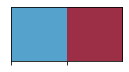

In [ ]:
sns.set_palette(['#55a3cd', '#9c2f45'])
sns.palplot(sns.color_palette())

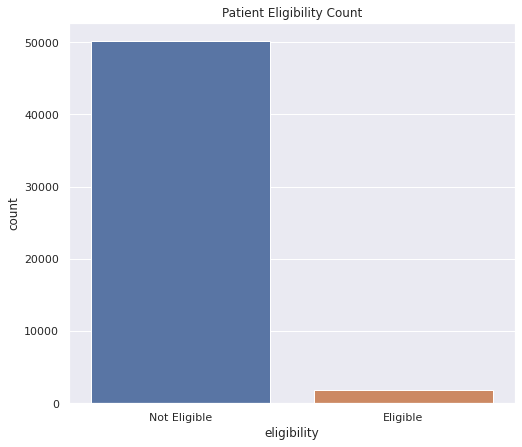

In [ ]:
#Visualize counts
sns.set(rc={'figure.figsize':(8,7)})
g = sns.countplot(x = pat_precondition['eligibility'])
g.set_xticklabels(['Not Eligible','Eligible'])
plt.title('Patient Eligibility Count')
plt.show()

In [ ]:
'''rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = pat_precondition.corr()
corr.style.background_gradient(cmap='BrBG')'''

"rs = np.random.RandomState(0)\ndf = pd.DataFrame(rs.rand(10, 10))\ncorr = pat_precondition.corr()\ncorr.style.background_gradient(cmap='BrBG')"

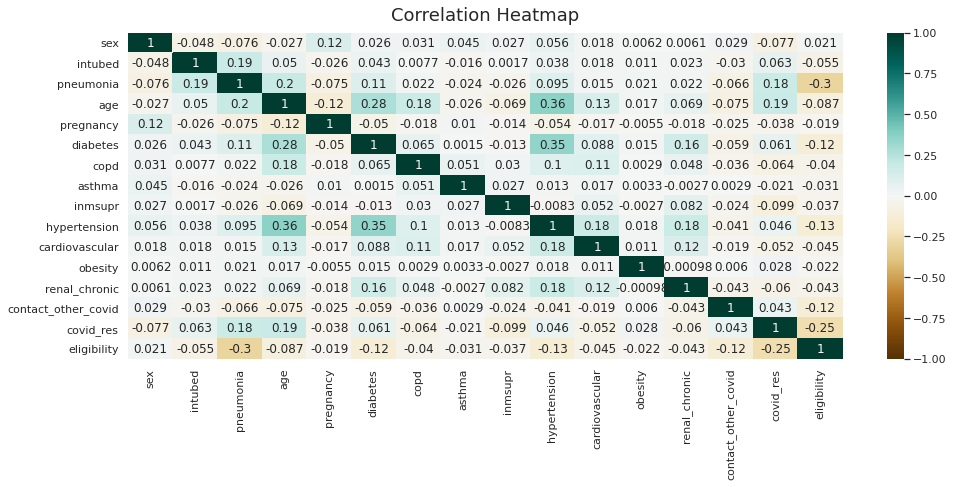

In [ ]:
#Stronger correlation on both ends of the spectrum pops out in darker, weaker correlation in lighter shades.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(pat_precondition.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=200, bbox_inches='tight')

In [ ]:
pat_precondition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52054 entries, 21 to 499688
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  52054 non-null  int64
 1   intubed              52054 non-null  int64
 2   pneumonia            52054 non-null  int64
 3   age                  52054 non-null  int64
 4   pregnancy            52054 non-null  int64
 5   diabetes             52054 non-null  int64
 6   copd                 52054 non-null  int64
 7   asthma               52054 non-null  int64
 8   inmsupr              52054 non-null  int64
 9   hypertension         52054 non-null  int64
 10  cardiovascular       52054 non-null  int64
 11  obesity              52054 non-null  int64
 12  renal_chronic        52054 non-null  int64
 13  contact_other_covid  52054 non-null  int64
 14  covid_res            52054 non-null  int64
 15  eligibility          52054 non-null  int64
dtypes: int64(16)
memory 

In [ ]:
'''pd.crosstab(pat_precondition.age,pat_precondition.eligibility).plot(kind="bar",figsize=(20,6))
plt.title('Eligibility Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()'''

'pd.crosstab(pat_precondition.age,pat_precondition.eligibility).plot(kind="bar",figsize=(20,6))\nplt.title(\'Eligibility Frequency for Ages\')\nplt.xlabel(\'Age\')\nplt.ylabel(\'Frequency\')\nplt.show()'

##Model Training: Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
#Reserve 1
'''labels = pat_precondition['eligibility']
features = pat_precondition.drop(columns=['eligibility'])'''

"labels = pat_precondition['eligibility']\nfeatures = pat_precondition.drop(columns=['eligibility'])"

In [ ]:
X = np.array(pat_precondition.drop(['eligibility'], 1))
y = np.array(pat_precondition['eligibility'])

In [ ]:
X = X.astype('float32')
y = y.astype('float32')

##Splitting Data

Training set - use to train the model

Validation set - check overfitting of the model

Testing set - check how well the model does

In [ ]:
X = X.astype('float32')
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
y = y.astype('float32')

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.3)

In [ ]:
X_train.shape

(36437, 15)

In [ ]:
y_train.shape

(36437,)

In [ ]:
pd.value_counts(y_train[:,])

0.0    35115
1.0     1322
dtype: int64

##Oversampling(Training Dataset): ADASYN: Adaptive Synthetic Sampling Approach
ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.

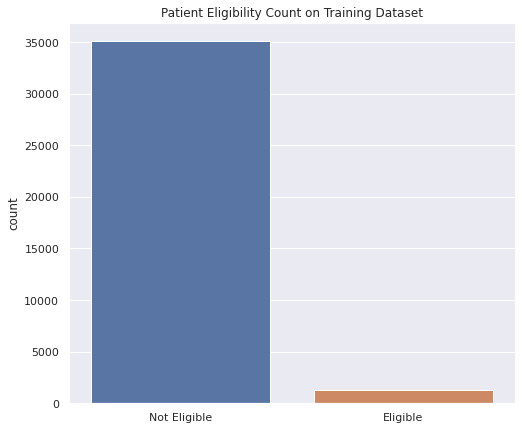

In [ ]:
#Visualize counts on the training dataset before balancing
sns.set(rc={'figure.figsize':(8,7)})
g = sns.countplot(x = y_train[:,])
g.set_xticklabels(['Not Eligible','Eligible'])
plt.title('Patient Eligibility Count on Training Dataset')
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train_mod, y_train_mod = ada.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
counter = Counter(y_train_mod)
print('After',counter)

Before Counter({0.0: 35115, 1.0: 1322})
After Counter({0.0: 35115, 1.0: 35114})


In [ ]:
'''from sklearn.preprocessing import normalize
X_train_mod = normalize(X_train_mod)
X_test = normalize(X_test)'''

'from sklearn.preprocessing import normalize\nX_train_mod = normalize(X_train_mod)\nX_test = normalize(X_test)'

In [ ]:
X_train_mod[0]

array([ 1.2385588 , -0.39637807, -1.5472603 ,  0.7580756 , -0.09917501,
       -0.62342775, -0.20503335, -0.16067313, -0.19163965, -0.64800674,
       -0.23017094, -0.1146417 ,  4.4986515 ,  1.5783578 , -1.3068134 ],
      dtype=float32)

In [ ]:
X_train_mod.shape

(70229, 15)

In [ ]:
'''Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])'''

'Y_train_binary = y_train.copy()\nY_test_binary = y_test.copy()\n\nY_train_binary[Y_train_binary > 0] = 1\nY_test_binary[Y_test_binary > 0] = 1\n\nprint(Y_train_binary[:20])'

In [ ]:
!pip install tensorboardcolab

  Created wheel for tensorboardcolab: filename=tensorboardcolab-0.0.22-cp37-none-any.whl size=3860 sha256=3fbc2956df8ead04eabadea2ffb77c4587a9f9d0e84b0c493d7e69be8efc5747
  Stored in directory: /root/.cache/pip/wheels/c4/aa/a0/3aaf4f1a66adbdab9b7bdd4c96db8ada89eb7cd87200cfdd32
Successfully built tensorboardcolab


In [ ]:
from keras.callbacks import TensorBoard
%load_ext tensorboard
!rm -rf ./logs/ #to delete previous runs
%tensorboard --logdir logs/
tensorboard = TensorBoard(log_dir="./logs")

In [ ]:
!kill 696

/bin/bash: line 0: kill: (696) - No such process


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=15,kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    #model.add(Dropout(0.7))
    #model.add(Dense(20, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    #model.add(Dropout(0.6))
    model.add(Dense(30,kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),  activation='relu'))
   # model.add(Dropout(0.7))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    '''lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)'''
    #optimizer = SGD(learning_rate=lr_schedule)
    adam = SGD(lr=1e-3)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()


print(binary_model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 60)                960       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=binary_model.fit(X_train_mod, y_train_mod,batch_size= 128, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
549/549 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.6751 - val_loss: 0.7002 - val_accuracy: 0.4989
Epoch 2/100
549/549 [==============================] - 1s 1ms/step - loss: 0.6479 - accuracy: 0.7820 - val_loss: 0.6807 - val_accuracy: 0.7425
Epoch 3/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5999 - accuracy: 0.8717 - val_loss: 0.6524 - val_accuracy: 0.7842
Epoch 4/100
549/549 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.8882 - val_loss: 0.6146 - val_accuracy: 0.8020
Epoch 5/100
549/549 [==============================] - 1s 1ms/step - loss: 0.4710 - accuracy: 0.8988 - val_loss: 0.5640 - val_accuracy: 0.8222
Epoch 6/100
549/549 [==============================] - 1s 1ms/step - loss: 0.4084 - accuracy: 0.9094 - val_loss: 0.5087 - val_accuracy: 0.8486
Epoch 7/100
549/549 [==============================] - 1s 1ms/step - loss: 0.3570 - accuracy: 0.9238 - val_loss: 0.4535 - val_accuracy: 0.8719

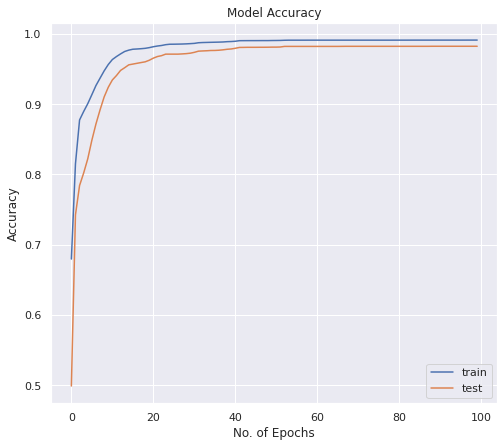

In [ ]:
# Model accuracy
sns.set(rc={'figure.figsize':(8,7)})

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'])
plt.show()

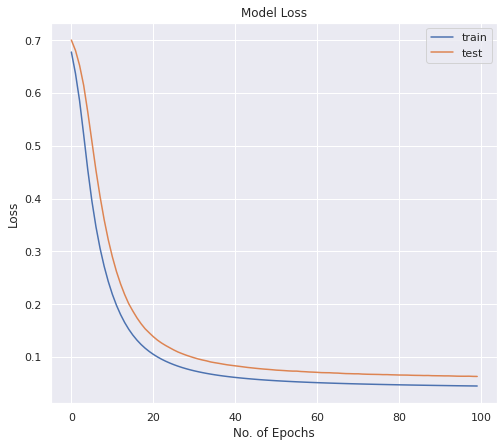

In [ ]:
# Model Losss
sns.set(rc={'figure.figsize':(8,7)})
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

Results for Binary Model
0.9823909841839021
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15051
         1.0       0.67      1.00      0.80       566

    accuracy                           0.98     15617
   macro avg       0.84      0.99      0.90     15617
weighted avg       0.99      0.98      0.98     15617



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, binary_pred)
conf_matrix

array([[14776,   275],
       [    0,   566]])

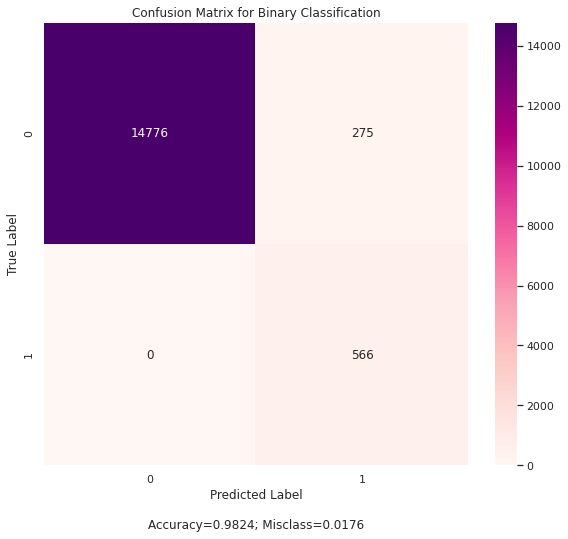

In [ ]:
accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
misclass = 1 - accuracy
plt.title('Confusion Matrix for Binary Classification')
sns.set(rc={'figure.figsize':(4,2)})
#plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True,fmt='', cmap='RdPu')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label\n\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
plt.show()

In [ ]:
!tensorboard dev upload --logdir logs --name "ANN" --description "Smart Predictive Analysis in Patient Recruitment" 

In [ ]:
!pip install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=0b06a27dd328bc111cf30635eb7e0b6c32b06007247a5e3662f8427b039b573f
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [ ]:
!pip install graphviz

In [ ]:
from ann_visualizer.visualize import ann_viz
ann_viz(binary_model, view= True, filename="network.gv",title="Network Topology")

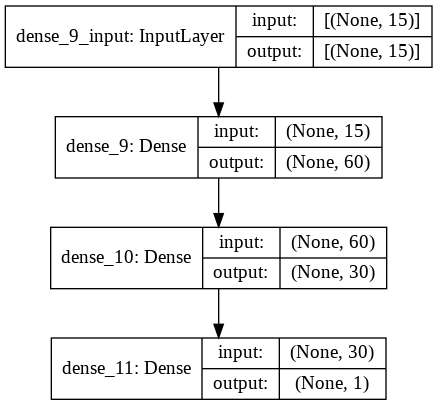

In [ ]:
from keras.utils import plot_model
plot_model(binary_model, to_file='/tmp/model.png', show_shapes=True,)

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
predictions = binary_model.predict_classes(X_train)
# summarize the first 5 cases
for i in range(100):
	print('%s => %d (expected %d)' % (X_train[i].tolist(), predictions[i], y_train[i]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1.2385587692260742, -0.3963780701160431, -1.5472602844238281, 0.7580755949020386, -0.09917500615119934, -0.6234277486801147, -0.2050333470106125, -0.160673126578331, -0.19163964688777924, -0.6480067372322083, -0.23017093539237976, -0.1146416962146759, 4.498651504516602, 1.5783578157424927, -1.306813359260559] => 0 (expected 0)
[-0.8073899745941162, -0.3963780701160431, 0.6463037729263306, 0.6056532263755798, -0.09917500615119934, 1.6040352582931519, -0.2050333470106125, -0.160673126578331, -0.19163964688777924, 1.5431939363479614, -0.23017093539237976, -0.1146416962146759, -0.22228886187076569, -0.6335697770118713, 0.7652201652526855] => 0 (expected 0)
[1.2385587692260742, 2.5228443145751953, 0.6463037729263306, -0.7153401374816895, -0.09917500615119934, 1.6040352582931519, -0.2050333470106125, -0.160673126578331, -0.19163964688777924, 1.5431939363479614, -0.23017093539237976, 0.2983953356742859, -0.22228886187076569, 1.5783578157424927, 0.7652201652526855] => 0 (expected 0)
[-0.80738